In [2]:
# import neurokit2 as nk
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode

# Utils

In [ ]:
def plot_histogram(series, bins=10, title='Histogram', xlabel='Values', ylabel='Frequency'):
    """
    Plots a histogram from a pandas Series.
    
    Parameters:
    series (pd.Series): The data to plot.
    bins (int): Number of bins in the histogram (default is 10).
    title (str): The title of the histogram (default is 'Histogram').
    xlabel (str): The label for the x-axis (default is 'Values').
    ylabel (str): The label for the y-axis (default is 'Frequency').
    """
    plt.figure(figsize=(10, 6))
    plt.hist(series, bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
def scatter_plot_feature(dataframe, feature, num_points=100, title='Scatter Plot', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), dataframe[feature][0:num_points], alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
    
def scatter_plot_feature_with_label(dataframe, feature, label, num_points=100, title='Scatter Plot with Labels', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature and the label values.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    label (str): The name of the label column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot with Labels').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), dataframe[feature][0:num_points], alpha=0.6, label=feature, marker='o')
    plt.scatter(range(num_points), dataframe[label][0:num_points], alpha=0.6, label=label, marker='x')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_feature_with_label(dataframe, feature, label, num_points=100, title='Scatter Plot with Labels', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature and the label values.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    label (str): The name of the label column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot with Labels').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_points), dataframe[feature][0:num_points], alpha=0.6, label=feature)
    plt.plot(range(num_points), dataframe[label][0:num_points], alpha=0.8, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
def plot_feature(dataframe, feature, num_points=100, title='Scatter Plot', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_points), dataframe[feature][0:num_points])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
    
def split_in_windows(signal, window_size, overlap = 0) : 
    step_size = window_size - overlap
    windows = [] 
    for i in range(0, len(signal), step_size) : 
        temp = signal[i : i + step_size] 
        if len(temp) == window_size : 
            windows.append(temp)
            
    return np.array(windows)

def label_for_window(labels) : 
    res = []
    for label in labels : 
        mode_values = mode(label, axis=0)
        labels_per_win = mode_values.mode.flatten()[0]
        res.append(labels_per_win) 
        
    return np.array(res)

# Load Physio Data 

In [14]:
bvp_df = pd.read_csv("./src/notebooks/data/BVP.csv", sep=';')
acc_df = pd.read_csv("./src/notebooks/data/ACC.csv", sep=';')
temp_df = pd.read_csv("./src/notebooks/data/TEMP.csv", sep=';')
eda_df = pd.read_csv("./src/notebooks/data/EDA.csv", sep=';')

In [15]:
acc_df['magnitude'] = np.sqrt(acc_df['x_axis']**2 + acc_df['y_axis']**2 + acc_df['z_axis']**2)

In [18]:
bvp_df.subject.unique().shape

(63,)

In [21]:
physio_df = pd.read_csv("./src/notebooks/data/labeled_features_win1.csv", sep=";")

In [23]:
physio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36918 entries, 0 to 36917
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAmean        36918 non-null  float64
 1   EDAstd         36918 non-null  float64
 2   EDAmin         36918 non-null  float64
 3   EDAmax         36918 non-null  float64
 4   trial          36918 non-null  object 
 5   subject        36918 non-null  object 
 6   TEMPmean       36918 non-null  float64
 7   TEMPstd        36918 non-null  float64
 8   TEMPslope      36918 non-null  float64
 9   x_axismean     36918 non-null  float64
 10  x_axisstd      36918 non-null  float64
 11  x_axismin      36918 non-null  int64  
 12  x_axismax      36918 non-null  int64  
 13  y_axismean     36918 non-null  float64
 14  y_axisstd      36918 non-null  float64
 15  y_axismin      36918 non-null  int64  
 16  y_axismax      36918 non-null  int64  
 17  z_axismean     36918 non-null  float64
 18  z_axis

# Load Cpt Data

In [27]:
cpt_df = pd.read_excel("./src/notebooks/data/Cpt_data.xlsx")

In [45]:
cpt_df.head()

,ID,Essai,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase
0,ID10,1,96.099953,55.673687,40.426266,22.837461,23,17.58880,24,5,1
1,ID10,2,54.533314,31.585220,22.948090,22.248150,21,0.69994,2,1,2
2,ID10,3,41.166672,24.883051,16.283621,16.283621,15,0.00000,0,0,2
3,ID10,4,42.422218,22.697981,19.724239,19.724239,19,0.00000,0,0,3
4,ID10,5,33.722225,18.840277,14.881948,14.881948,17,0.00000,0,0,3


In [38]:
cpt_df.ID.unique()

array(['ID10', 'ID12', 'ID14', 'ID15', 'ID16', 'ID17', 'ID18', 'ID19',
       'ID20', 'ID21', 'ID22', 'ID23', 'ID24', 'ID25', 'ID26', 'ID27',
       'ID28', 'ID29', 'ID30', 'ID31', 'ID32', 'ID33', 'ID34', 'ID35',
       'ID36', 'ID37', 'ID38', 'ID39', 'ID40', 'ID41', 'ID42', 'ID43',
       'ID44', 'ID45', 'ID46', 'ID47', 'ID48', 'ID49', 'ID50', 'ID51',
       'ID52', 'ID53', 'ID54', 'ID55', 'ID56', 'ID57', 'ID58', 'ID59',
       'ID60', 'ID62', 'ID63', 'ID64', 'ID65', 'ID66', 'ID67', 'ID68',
       'ID69', 'ID70', 'ID71', 'ID9'], dtype=object)

# Data Inspection

In [42]:
def plot_cpt_data(feature : str ) : 
    unique_ids = cpt_df["ID"].unique()

    num_ids = len(unique_ids)
    num_cols = 3
    num_rows = (num_ids + num_cols - 1) // num_cols  # Ceiling division to get the number of rows needed

    # Create a new figure with a larger size
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))

    # Plot each ID's data
    for idx, id in enumerate(unique_ids):
        filtered_df = cpt_df[cpt_df["ID"] == id]
        ax = axes.flatten()[idx]
        ax.bar(filtered_df["Essai"], filtered_df[feature])
        ax.set_title(f"Subject: {id}")
        ax.set_xlabel("Essai")
        ax.set_ylabel(feature)
        ax.grid(True)

    # Remove empty subplots
    for j in range(idx + 1, len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

- Plot the evolution of Temps total Activite


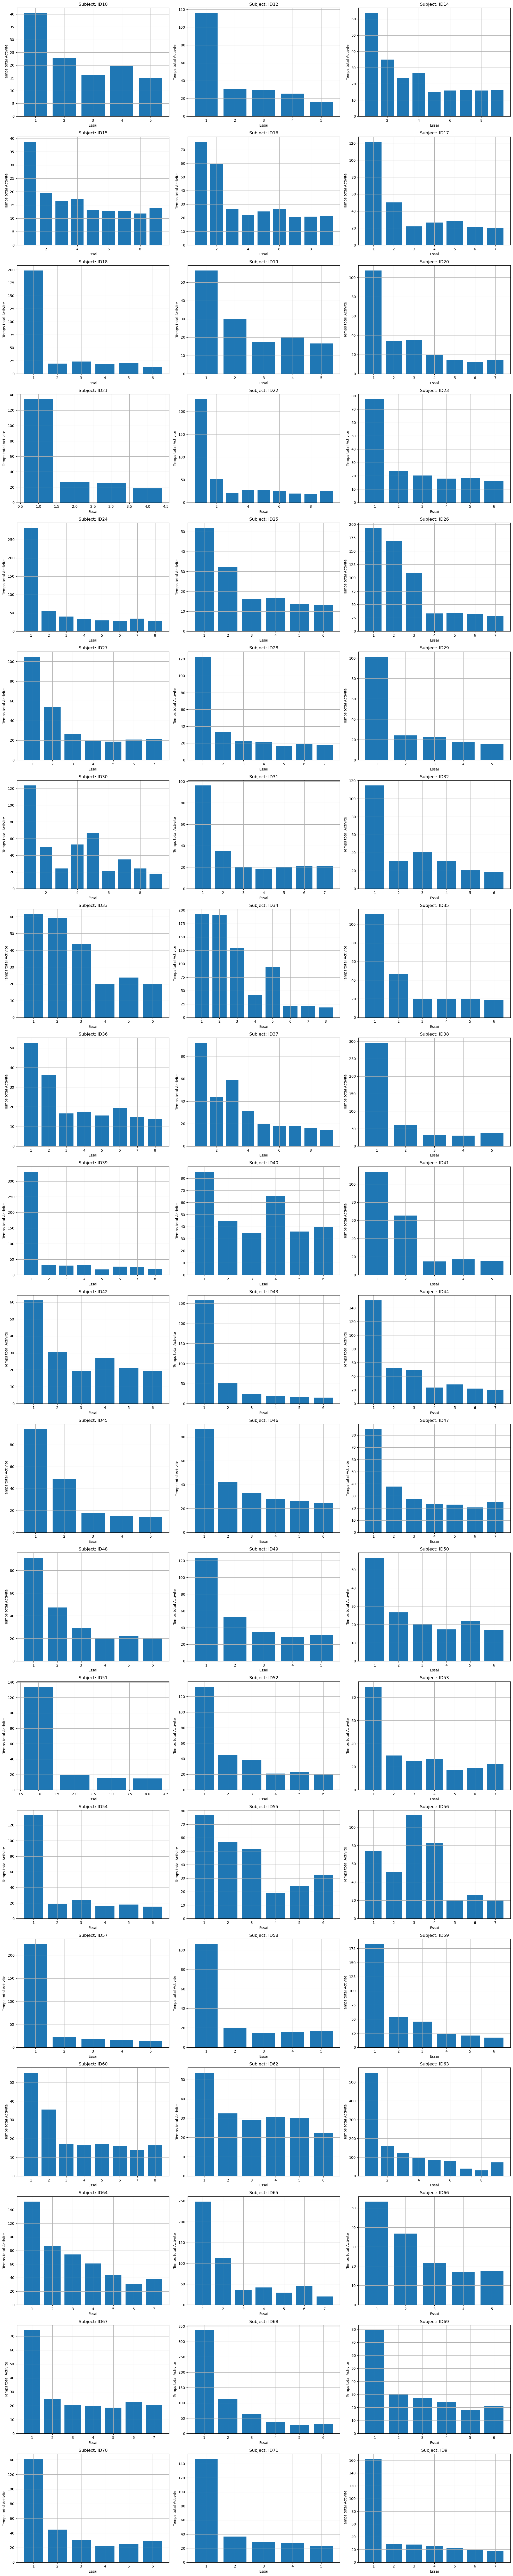

In [48]:
## Plot the evolution of Temps total Activite

print(f"- Plot the evolution of Temps total Activite")
plot_cpt_data('Temps total Activite')

In [30]:
cpt_df[cpt_df["ID"] == "ID10"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    5 non-null      object 
 1   Essai                                 5 non-null      int64  
 2   Temps Experience                      5 non-null      float64
 3   Temps total Inactivite                5 non-null      float64
 4   Temps total Activite                  5 non-null      float64
 5   Temps total de Manipulation           5 non-null      float64
 6   Nbr Total de Manipulation             5 non-null      int64  
 7   Temps Total Consultation Instruction  5 non-null      float64
 8   Nb Total de Consultation              5 non-null      int64  
 9   Nombre erreur                         5 non-null      int64  
 10  Proposition_Phase                     5 non-null      int64  
dtypes: float64(5), int64(5), obj